# RL: Markov Decision Process
Author: Arin Avanoosyan

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Problem 2

In [ ]:
reward = np.array([10, 0, 3])
value_ = np.array(3)
P = np.array([
    [0.6, 0.1, 0.3],
    [0.3, 0.4, 0.3],
    [0.4, 0.2, 0.4],
])

I = np.eye(3)
gamma_discount= 0.9

value_ = np.linalg.inv(I - gamma_discount*P)@reward
value_ = np.round(value_, 2)
print("Final Value State Function: \n",value_)

Final Value State Function: 
 [63.24 49.55 54.2 ]


In [ ]:
def compute_value(P, reward, gamma_discount):
  value_ = np.array(3)
  I = np.eye(3)
  gamma_discount= 0.9
  value_ = np.linalg.inv(I - gamma_discount*P)@reward
  value_ = np.round(value_, 2)
  print("Final Value State Function: \n",value_)
  return value_

#Problem 3

In [ ]:
P_a0 = np.array([
    [0.5, 0.15, 0.35],
    [0.25, 0.4, 0.35],
    [0.35, 0.25, 0.4]
])


P_a1 = np.array([
    [0.7, 0.05, 0.25],
    [0.35, 0.3, 0.35],
    [0.45, 0.1, 0.45]
])

P_a2 = np.array([
    [0.4, 0.35, 0.25],
    [0.2, 0.6, 0.2],
    [0.3, 0.4, 0.3]
])

R_a0 = reward
R_a1 = np.array([15, 0, 5])

R_a2 = np.array([8, 0, 2])

#Added this to use in my policy_iteration code
R_stack = np.stack([R_a0, R_a1, R_a2], axis=0)

policy_ = np.array([0.35, 0.45, 0.20])


value_ = np.array([63.24, 49.55, 54.2])


print("Action0 Transition Matrix\n")
print(P_a0)

print("\nAction1 Transition Matrix\n")
print(P_a1)

print("\nAction2 Transition Matrix\n")
print(P_a2)

print("\nRewards for Action0")
print(R_a0)

print("\nRewards for Action1")
print(R_a1)

print("\nRewards for Action2")
print(R_a2)

print("\nPolicy")
print(policy_)

print("\nState Values")
print(value_)

Action0 Transition Matrix

[[0.5  0.15 0.35]
 [0.25 0.4  0.35]
 [0.35 0.25 0.4 ]]

Action1 Transition Matrix

[[0.7  0.05 0.25]
 [0.35 0.3  0.35]
 [0.45 0.1  0.45]]

Action2 Transition Matrix

[[0.4  0.35 0.25]
 [0.2  0.6  0.2 ]
 [0.3  0.4  0.3 ]]

Rewards for Action0
[10  0  3]

Rewards for Action1
[15  0  5]

Rewards for Action2
[8 0 2]

Policy
[0.35 0.45 0.2 ]

State Values
[63.24 49.55 54.2 ]


In [ ]:
P_stacked = np.stack([P_a0, P_a1, P_a2], axis=0)
P_avg = np.tensordot(policy_, P_stacked, axes=(0, 0))
print("\nWeighted Transition matrix by the policy\n")
print(P_avg)
R_avg = (policy_[0]* R_a0 + policy_[1] * R_a1 +policy_[2]*R_a2)
print("\nWeighted Reward vector by the policy\n")
print(R_avg)
V = np.linalg.inv(I - gamma_discount*P_avg)@R_avg
V = np.round(V, 2)
# Q = R_avg.T + ((gamma_discount*P_avg)@V.T)
# Q = np.round(Q, 2)

Q = np.zeros((3, 3))
for a in range(3):
    if a == 0:
        P = P_a0
        R = R_a0
    elif a == 1:
        P = P_a1
        R = R_a1
    elif a == 2:
        P = P_a2
        R = R_a2
    Q[:, a] = R + gamma_discount * np.dot(P, V)


Q = np.round(Q, 2)
print("\nWeighted State-Value Function by the policy\n")
print(V)
print("\nWeighted Action-Value Function by the policy\n")
print(Q)



Weighted Transition matrix by the policy

[[0.57   0.145  0.285 ]
 [0.285  0.395  0.32  ]
 [0.385  0.2125 0.4025]]

Weighted Reward vector by the policy

[11.85  0.    3.7 ]

Weighted State-Value Function by the policy

[71.89 56.19 61.71]

Weighted Action-Value Function by the policy

[[69.37 76.7  65.46]
 [55.84 57.26 54.39]
 [60.5  64.17 58.3 ]]


I am creating a function to calculate the Q value specific to the
assignment, for further use.

In [ ]:
def compute_Q_value(V, P, P_a0, P_a1, P_a2):
  Q = np.zeros((3, 3))
  for a in range(3):
      if a == 0:
          P = P_a0
          R = R_a0
      elif a == 1:
          P = P_a1
          R = R_a1
      elif a == 2:
          P = P_a2
          R = R_a2
      Q[:, a] = R + gamma_discount * np.dot(P, V)
  Q = np.round(Q, 2)
  return Q

Now let us get the optimal policy based on the Q matrix

In [ ]:
policy_ = np.argmax(Q, axis=1)
optimal_values = Q[np.arange(len(policy_)), policy_]
print(optimal_values)

[76.7  57.26 64.17]


Turns out taking the action 1 at all 3 states is the best policy

In [ ]:
# visited = set()

In [ ]:
# def compute_state_value(state, visited=set()):
#     if policy_<= policy_new:
#         return 0
#     if state in visited:
#         return 0
#     visited.add(state)
#     action = policy.get(state, 0)

#     if state not in states or action not in actions:
#         return 0
#     #probability for each action (policy?), I use the unwrapped for gym
#     # transition = env.unwrapped.P[state][action]
#     state_value = 0

#     for prob, next_state, reward, done in transition:
#         state_value += prob * (reward + gamma * compute_state_value(next_state, visited.copy()))

#     return state_valuea

In [ ]:
gamma =0.8
terminal_state = 14
def compute_q_values(state, action):
  if state == terminal_state:
    return 0

  q_value = 0
  for prob, next_state, reward, terminated in env.unwrapped.P[state][action]:
      q_value += prob * (reward + gamma * compute_state_value(next_state) if not terminated else reward)

  return q_value

In [ ]:
num_states = P_avg.shape[0]
num_actions = P_avg.shape[1]
print("Number of States: ", num_states)
print("Number of States: ", num_actions)

Number of States:  3
Number of States:  3


#Policy Evaluation

In [ ]:
def policy_evaluation(policy):
    V = {state: compute_state_value(state) for state in range(num_states)}
    return V

#Policy Improvement

In [ ]:
def policy_improvement(policy):
    improved_policy = {s: 0 for s in range(num_states-1)}
    Q = {(state, action): compute_q_value(state, action, policy) for state in range(num_states) for action in range(num_actions)}
    for state in range(num_states-1):
        max_action = max(range(num_actions), key=lambda action:Q[(state, action)] )
        improved_policy[state] = max_action

    return improved_policy

#Polic Iteration
*Putting Evaluation and Improvement Together*

In [ ]:
# def policy_iteration():
#     policy = {0:2, 1:2, 2:1, 3:1, 4:0, 5:0, 6:2, 7:2}
#     while True:
#         V = policy_evaluation(policy)
#         improved_policy = policy_improvement(policy)
#         if improved_policy == policy:
#             break
#         policy = improved_policy

#     return policy, V

# policy, V = policy_iteration()

In [ ]:
# def value_iteration():
#     if state == terminal_state:
#         return 0
#     action = policy.get(state, 0)
#     if state not in env.unwrapped.P or action not in env.unwrapped.P[state]:
#         return 0
#     state_transitions = env.unwrapped.P[state][action]  # List of (prob, next_state, reward, done) tuples

#     expected_value = 0
#     print("Final Value State Function: \n",value_)
#     for prob, next_state, reward, done in state_transitions:
#         expected_value += prob * (reward + gamma * compute_state_value(next_state)) #if not done else reward)

#     return expected_value

#Richardson Iteration

I created an episodic task sample to test my function on, since the Problems1-3 are not episodic, but continuous.
The code below is the general case.

In [ ]:
def richardson_iteration_value_function(P, R, gamma, max_iterations=1000, tolerance=1e-6):
    n_states = P.shape[0]
    value_ = np.zeros(n_states)
    deltas = []

    for i in range(max_iterations):
        value_new = R + gamma * np.dot(P, value_)
        delta = np.max(np.abs(value_new - value_))
        deltas.append(delta)
        value_ = value_new
        if delta < tolerance:
            print(f"Converged after {i+1} iterations")
            break

    return value_, deltas

value_, deltas = richardson_iteration_value_function(P_avg, R_avg, gamma_discount)
value_ = np.round(value_, 2)
print("\nWeighted State-Value Function by the policy\n")
print(value_)

Converged after 150 iterations

Weighted State-Value Function by the policy

[71.89 56.19 61.71]


Note that I got exactly the same State-Value function as in the Problem 3. As instructed, I will create a more general maze case, to test my richardson iteration on.

Converged after 154 iterations
Final value function:
[29.16517594 39.96709628 58.37036797 99.99999102]


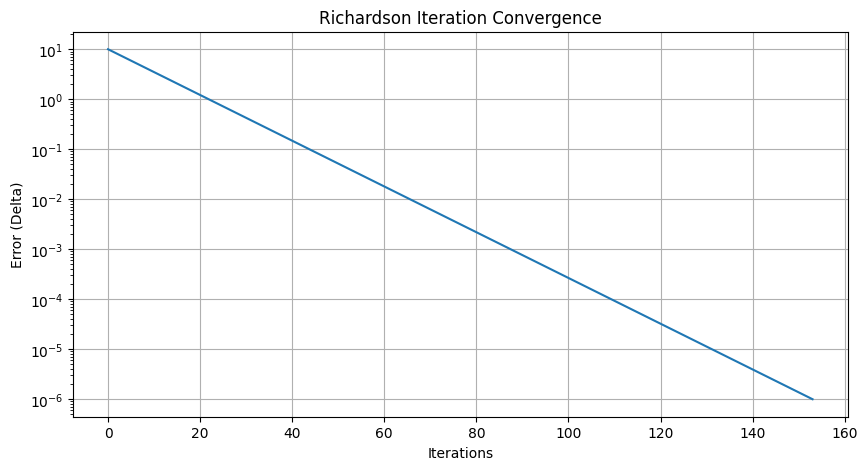


Analytical solution:
[ 29.16518492  39.96710526  58.37037696 100.        ]
Difference: 8.981449937550678e-06


In [ ]:
def my_mdp():

    P = np.array([
        [0.7, 0.3, 0.0, 0.0],
        [0.1, 0.6, 0.3, 0.0],
        [0.0, 0.1, 0.7, 0.2],
        [0.0, 0.0, 0.0, 1.0]
    ])

    R = np.array([0, 0, 0, 10])

    gamma = 0.9

    return P, R, gamma

P, R, gamma = my_mdp()
V, errors = richardson_iteration_value_function(P, R, gamma)

print("Final value function:")
print(V)


plt.figure(figsize=(10, 5))
plt.plot(errors)
plt.xlabel('Iterations')
plt.ylabel('Error (Delta)')
plt.title('Richardson Iteration Convergence')
plt.yscale('log')
plt.grid(True)
plt.show()


I = np.eye(P.shape[0])
V_analytical = np.linalg.solve(I - gamma * P, R)
print("\nAnalytical solution:")
print(V_analytical)
print(f"Difference: {np.max(np.abs(V - V_analytical))}")

#Richardson Iteration

In [ ]:
def policy_evaluation_richardson(P_stacked, R_stack, policy, gamma, max_iter=1000, tol=1e-6):
    n_states = P_stacked.shape[1]
    V = np.zeros(n_states)  # Initialize value function

    # Convert deterministic policy indices to transition matrix and reward vector
    P_policy = np.zeros((n_states, n_states))
    R_policy = np.zeros(n_states)

    for s in range(n_states):
        a = policy[s]
        P_policy[s] = P_stacked[a, s]
        R_policy[s] = R_stack[a, s]

    # Richardson iteration
    for i in range(max_iter):
        delta = 0
        # Perform Bellman update: V_new = R + gamma * P * V
        V_new = R_policy + gamma * np.dot(P_policy, V)

        # Check convergence
        delta = np.max(np.abs(V_new - V))
        V = V_new

        if delta < tol:
            print(f"Policy evaluation converged after {i+1} iterations")
            break

    return V

# Problem 2: Policy Iteration

In [ ]:
def policy_iteration(P_stack, R_stack, gamma, max_iter=100, eval_max_iter=1000, tol=1e-6):
    n_states = P_stack.shape[1]
    n_actions = P_stack.shape[0]
    policy = np.zeros(n_states, dtype=int)

    for i in range(max_iter):
        V = policy_evaluation_richardson(P_stack, R_stack, policy, gamma, eval_max_iter, tol)
        policy_stable = True

        for s in range(n_states):
            old_action = policy[s]
            Q_s = np.zeros(n_actions)
            for a in range(n_actions):
                Q_s[a] = R_stack[a, s] + gamma * np.dot(P_stack[a, s], V)
            policy[s] = np.argmax(Q_s)
            if old_action != policy[s]:
                policy_stable = False

        print(f"Iteration {i+1}, Policy: {policy}")
        if policy_stable:
            print(f"Policy iteration converged after {i+1} iterations")
            break

    return policy, V

# Problem 3: Value Iteration

In [ ]:
def value_iteration(P_stack, R_stack, gamma, max_iter=1000, tol=1e-6):
    n_states = P_stack.shape[1]
    n_actions = P_stack.shape[0]
    V = np.zeros(n_states)

    for i in range(max_iter):
        delta = 0
        for s in range(n_states):
            v = V[s]
            Q_s = np.zeros(n_actions)
            for a in range(n_actions):
                Q_s[a] = R_stack[a, s] + gamma * np.dot(P_stack[a, s], V)
            V[s] = np.max(Q_s)
            delta = max(delta, np.abs(v - V[s]))
        if delta < tol:
            print(f"Value iteration converged after {i+1} iterations")
            break
    policy = np.zeros(n_states, dtype=int)
    for s in range(n_states):
        Q_s = np.zeros(n_actions)
        for a in range(n_actions):
            Q_s[a] = R_stack[a, s] + gamma * np.dot(P_stack[a, s], V)
        policy[s] = np.argmax(Q_s)

    return policy, V

In [ ]:
print("\n------Policy Evaluation------")
V_eval = policy_evaluation_richardson(P_stacked, R_stack, policy_, gamma)
print("Value function for policy [1, 1, 1]:")
print(V_eval)

print("\n----Policy Iteration----\n")
optimal_policy_pi, V_pi = policy_iteration(P_stacked, R_stack, gamma)
print("Optimal policy from Policy Iteration:")
print(optimal_policy_pi)
print("Optimal value function:")
print(V_pi)

print("\n---Value Iteration---\n")
optimal_policy_vi, V_vi = value_iteration(P_stacked, R_stack, gamma)
print("Optimal policy from Value Iteration:")
print(optimal_policy_vi)
print("Optimal value function:")
print(V_vi)


print("\n---Comparison---\n")
print("The Q value we got in the HW1:\n", Q)
print("\nAre the optimal policies the same?", np.array_equal(optimal_policy_pi, optimal_policy_vi))
print("Maximum difference in value functions:", np.max(np.abs(V_pi - V_vi)))

n_states = P_stacked.shape[1]
n_actions = P_stacked.shape[0]
Q_optimal = np.zeros((n_states, n_actions))
for s in range(n_states):
    for a in range(n_actions):
        Q_optimal[s, a] = R_stack[a, s] + gamma * np.dot(P_stacked[a, s], V_pi)

print("\nOptimal Q-values:")
print(np.round(Q_optimal, 2))
print("Optimal policy actions:")
print(np.argmax(Q_optimal, axis=1))


------Policy Evaluation------
Policy evaluation converged after 155 iterations
Value function for policy [1, 1, 1]:
[110.57287936  89.6686114   97.23057197]

----Policy Iteration----

Policy evaluation converged after 148 iterations
Iteration 1, Policy: [1 1 1]
Policy evaluation converged after 155 iterations
Iteration 2, Policy: [1 1 1]
Policy iteration converged after 2 iterations
Optimal policy from Policy Iteration:
[1 1 1]
Optimal value function:
[110.57287936  89.6686114   97.23057197]

---Value Iteration---

Value iteration converged after 126 iterations
Optimal policy from Value Iteration:
[1 1 1]
Optimal value function:
[110.57288153  89.66861403  97.23057471]

---Comparison---

The Q value we got in the HW1:
 [[69.37 76.7  65.46]
 [55.84 57.26 54.39]
 [60.5  64.17 58.3 ]]

Are the optimal policies the same? True
Maximum difference in value functions: 2.743670393101638e-06

Optimal Q-values:
[[102.49 110.57  97.93]
 [ 87.79  89.67  85.83]
 [ 93.01  97.23  90.39]]
Optimal poli

In [ ]:
print(Q)

[[69.37 76.7  65.46]
 [55.84 57.26 54.39]
 [60.5  64.17 58.3 ]]
